In [1]:
import os, sys
sys.path.append('D:/github/wrf-helper/')

from config.nesting import Box,Nest

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon

# Nesting

In [2]:
# geo input: central lon, central lat, lon-size, lat-size, lon-res, lat-res
# output: box id 1, box id 2, i-start(pixels from left), j-start(pixels from bottom)
geo1 = [-2, 56, 120, 120, 3000, 3000]
geo2 = [-2.1, 56.2, 120, 120, 1000, 1000]
box1 = Box(geo1); box2 = Box(geo2, box_num=2)
nest = Nest()
print(nest.nest(box1, box2))

D1 coords: [57.617002244019254, 54.382997755980746, 1.0191822938764044, 0.776616704219236, -5.019182293876405, -4.7766167042192365] 
 D2 Coords: [56.73900074800642, 55.66099925199359, -1.1172357571946763, -1.1444744044878572, -3.082764242805324, -3.055525595512143]
bound 1 west -4.866576786536428
37.90691111845303 47.42113997948002
(1, 2, 37.90691111845303, 47.42113997948002)


# Nesting results

In [3]:
box1.polygon

[(-4.7766167042192365, 54.382997755980746),
 (-5.019182293876405, 57.617002244019254),
 (1.0191822938764044, 57.617002244019254),
 (0.776616704219236, 54.382997755980746),
 (-4.7766167042192365, 54.382997755980746)]

In [4]:
p1 = Polygon(box1.polygon)
p2 = Polygon(box2.polygon)

In [5]:
xs, ys = zip(*box1.polygon)

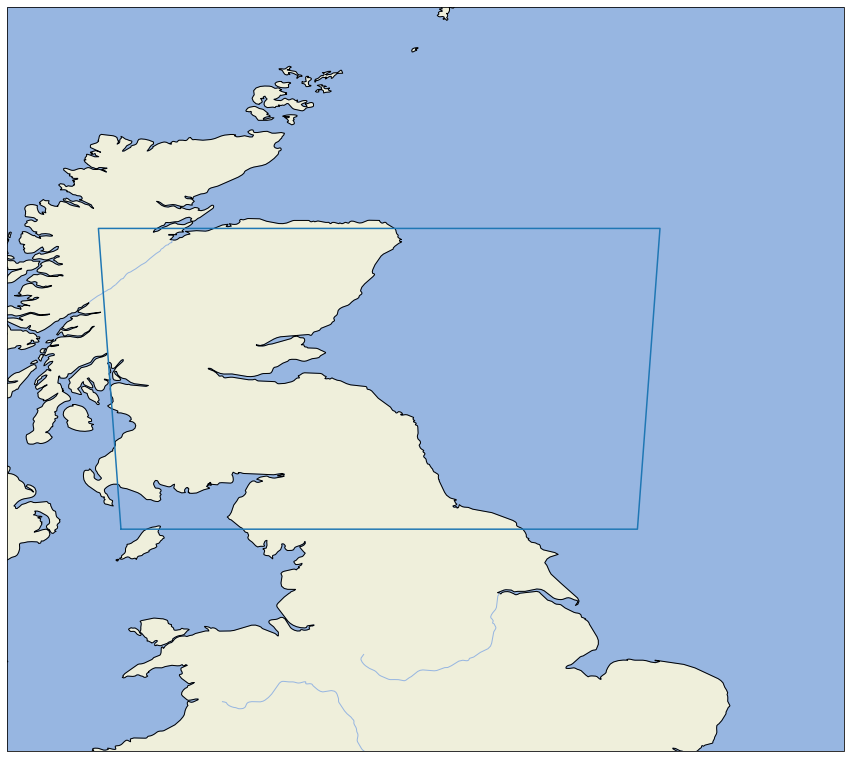

In [7]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
xs, ys = zip(*box1.polygon)
ax.plot(xs, ys)
ax.coastlines()
ax.set_extent([-6,3,52,60])
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

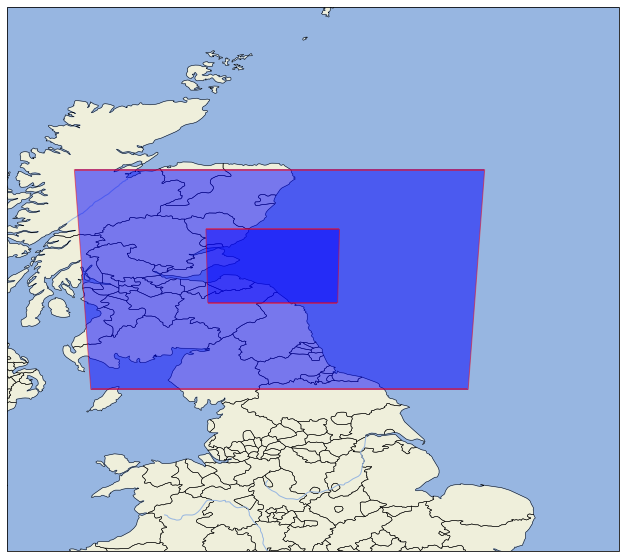

In [9]:
bounds = [-6,3,52,60]
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(bounds, crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

ax.add_geometries([p1], crs=ccrs.PlateCarree(), facecolor='b', edgecolor='red', alpha=0.5)
ax.add_geometries([p2], crs=ccrs.PlateCarree(), facecolor='b', edgecolor='red', alpha=0.5)

plt.show()